# Homework 1: Movies Database Sub-projects

__Some information on Features/Columns__:

* **id:** The ID of the movie (clear/unique identifier).
* **title:** The Official Title of the movie.
* **tagline:** The tagline of the movie.
* **release_date:** Theatrical Release Date of the movie.
* **genres:** Genres associated with the movie.
* **belongs_to_collection:** Gives information on the movie series/franchise the particular film belongs to.
* **original_language:** The language in which the movie was originally shot in.
* **budget_musd:** The budget of the movie in million dollars.
* **revenue_musd:** The total revenue of the movie in million dollars.
* **production_companies:** Production companies involved with the making of the movie.
* **production_countries:** Countries where the movie was shot/produced in.
* **vote_count:** The number of votes by users, as counted by TMDB.
* **vote_average:** The average rating of the movie.
* **popularity:** The Popularity Score assigned by TMDB.
* **runtime:** The runtime of the movie in minutes.
* **overview:** A brief blurb of the movie.
* **spoken_languages:** Spoken languages in the film.
* **poster_path:** The URL of the poster image.
* **cast:** (Main) Actors appearing in the movie.
* **cast_size:** number of Actors appearing in the movie.
* **director:** Director of the movie.
* **crew_size:** Size of the film crew (incl. director, excl. actors).

In [98]:
# importing the necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

pd.options.display.max_columns = 30 #Default is 20, but there are more than 20 columns in the dataset
pd.options.display.float_format = '{:.2f}'.format # All float numbers go to 2 decimal places

In [4]:
from IPython.display import HTML

In [6]:
# Reading in the datafile

address = 'C:\\Users\\Charbel\\Desktop\\Udemy\\Python Data Science with Pandas - Master 12 Advanced Projects\\Section 2 - Project 1 - Explanatory Data Analysis & Data Presentation (Movies Dataset)\\Project_01_Materials\\movies_complete.csv'

df = pd.read_csv(address, parse_dates = ["release_date"])

df.head()

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.00,373.55,Pixar Animation Studios,United States of America,5415.00,7.70,21.95,81.00,"Led by Woody, Andy's toys live happily in his ...",English,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13,106,John Lasseter
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.00,262.80,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,2413.00,6.90,17.02,104.00,When siblings Judy and Peter discover an encha...,English|Français,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26,16,Joe Johnston
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,en,NaN,NaN,Warner Bros.|Lancaster Gate,United States of America,92.00,6.50,11.71,101.00,A family wedding reignites the ancient feud be...,English,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,7,4,Howard Deutch
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,1995-12-22,Comedy|Drama|Romance,NaN,en,16.00,81.45,Twentieth Century Fox Film Corporation,United States of America,34.00,6.10,3.86,127.00,"Cheated on, mistreated and stepped on, the wom...",English,<img src='http://image.tmdb.org/t/p/w185//4wjG...,Whitney Houston|Angela Bassett|Loretta Devine|...,10,10,Forest Whitaker
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,1995-02-10,Comedy,Father of the Bride Collection,en,NaN,76.58,Sandollar Productions|Touchstone Pictures,United States of America,173.00,5.70,8.39,106.00,Just when George Banks has recovered from his ...,English,<img src='http://image.tmdb.org/t/p/w185//lf9R...,Steve Martin|Diane Keaton|Martin Short|Kimberl...,12,7,Charles Shyer


### Q1) Which Adam Sandler movie was the most popular?

__Filter__ out all __Adam Sandler__ movies and ranking them from __highest to lowest__ in popularity

First, I will extract relevent attributes and rename the columns so they are more easily referenceable

In [24]:
df_1 = df[['cast', 'title', 'poster_path', 'vote_count', 'vote_average', 'popularity']].copy()

df_1

,cast,title,poster_path,vote_count,vote_average,popularity
0,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,Toy Story,<img src='http://image.tmdb.org/t/p/w185//uXDf...,5415.00,7.70,21.95
1,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jumanji,<img src='http://image.tmdb.org/t/p/w185//vgpX...,2413.00,6.90,17.02
2,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,Grumpier Old Men,<img src='http://image.tmdb.org/t/p/w185//1FSX...,92.00,6.50,11.71
3,Whitney Houston|Angela Bassett|Loretta Devine|...,Waiting to Exhale,<img src='http://image.tmdb.org/t/p/w185//4wjG...,34.00,6.10,3.86
4,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Father of the Bride Part II,<img src='http://image.tmdb.org/t/p/w185//lf9R...,173.00,5.70,8.39
...,...,...,...,...,...,...
44686,Leila Hatami|Kourosh Tahami|Elham Korda,Subdue,<img src='http://image.tmdb.org/t/p/w185//pfC8...,1.00,4.00,0.07
44687,Angel Aquino|Perry Dizon|Hazel Orencio|Joel To...,Century of Birthing,<img src='http://image.tmdb.org/t/p/w185//xZkm...,3.00,9.00,0.18
44688,Erika Eleniak|Adam Baldwin|Julie du Page|James...,Betrayal,<img src='http://image.tmdb.org/t/p/w185//eGga...,6.00,3.80,0.90
44689,Iwan Mosschuchin|Nathalie Lissenko|Pavel Pavlo...,Satan Triumphant,<img src='http://image.tmdb.org/t/p/w185//aorB...,0.00,NaN,0.00


In [27]:
df_1.columns = ['Cast', 'Title', 'Poster', 'Number of Votes', 'Average', 'Popularity']
df_1 = df_1.dropna() # Drop the NaN values from the dataset

In [28]:
df_1

,Cast,Title,Poster,Number of Votes,Average,Popularity
0,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,Toy Story,<img src='http://image.tmdb.org/t/p/w185//uXDf...,5415.00,7.70,21.95
1,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jumanji,<img src='http://image.tmdb.org/t/p/w185//vgpX...,2413.00,6.90,17.02
2,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,Grumpier Old Men,<img src='http://image.tmdb.org/t/p/w185//1FSX...,92.00,6.50,11.71
3,Whitney Houston|Angela Bassett|Loretta Devine|...,Waiting to Exhale,<img src='http://image.tmdb.org/t/p/w185//4wjG...,34.00,6.10,3.86
4,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Father of the Bride Part II,<img src='http://image.tmdb.org/t/p/w185//lf9R...,173.00,5.70,8.39
...,...,...,...,...,...,...
44684,Lisa Boyle|Kena Land|Zaneta Polard|Don Yanan|D...,Caged Heat 3000,<img src='http://image.tmdb.org/t/p/w185//qyiY...,1.00,3.50,0.66
44685,Patrick Bergin|Uma Thurman|David Morrissey|Jür...,Robin Hood,<img src='http://image.tmdb.org/t/p/w185//rmVy...,26.00,5.70,5.68
44686,Leila Hatami|Kourosh Tahami|Elham Korda,Subdue,<img src='http://image.tmdb.org/t/p/w185//pfC8...,1.00,4.00,0.07
44687,Angel Aquino|Perry Dizon|Hazel Orencio|Joel To...,Century of Birthing,<img src='http://image.tmdb.org/t/p/w185//xZkm...,3.00,9.00,0.18


Filtered out and displayed the 10 __Most Popular__ Adam Sandler movies

In [40]:
adam_sandler = df_1.loc[df_1b, ['Title', 'Poster', 'Popularity']].sort_values('Popularity', ascending = False).set_index('Title').head(10)
HTML(adam_sandler.to_html(escape = False))

,Poster,Popularity
Title,,
Grown Ups,,23.98
Pixels,,21.15
Hotel Transylvania,,16.23
You Don't Mess with the Zohan,,13.12
Eight Crazy Nights,,11.79
Hotel Transylvania 2,,11.76
Zookeeper,,11.34
The Do-Over,,11.22
Spanglish,,11.20


From the list above __Grown Ups__ was Adam Sandler's most popular movie. This is logical because it was more family oriented than many of his earlier films such as __Happy Gillmore__ and __Billy Madison__.

### Q2) Whose movies have had higher <u><i>average</i></u> popularity, Bruce Willis or Liam Neeson?

To achieve this, both actors need to be filtered regardless of what movie they were in. The average metric was chosen because Bruce Willis has been in more films than Liam Neeson.

___Organizing the Data___

The data will be organized to the relevent columns and columns renamed. The dataset will be indexed by the movie ID.

In [38]:
df_2 = df.sort_values('id').set_index('id')
df_2

,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
id,,,,,,,,,,,,,,,,,,,,,
11,Star Wars,"A long time ago in a galaxy far, far away...",1977-05-25,Adventure|Action|Science Fiction,Star Wars Collection,en,11.00,775.40,Lucasfilm|Twentieth Century Fox Film Corporation,United States of America,6778.00,8.10,42.15,121.00,Princess Leia is captured and held hostage by ...,English,<img src='http://image.tmdb.org/t/p/w185//6FfC...,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,106,20,George Lucas
12,Finding Nemo,There are 3.7 trillion fish in the ocean. They...,2003-05-30,Animation|Family,Finding Nemo Collection,en,94.00,940.34,Pixar Animation Studios,United States of America,6292.00,7.60,25.50,100.00,"Nemo, an adventurous young clownfish, is unexp...",English,<img src='http://image.tmdb.org/t/p/w185//n5eT...,Albert Brooks|Ellen DeGeneres|Alexander Gould|...,24,104,Andrew Stanton
16,Dancer in the Dark,You don't need eyes to see.,2000-05-17,Drama|Crime|Music,Heart of Gold Collection,en,12.80,40.03,Fine Line Features|Zentropa Entertainments|Dan...,Argentina|Denmark|Finland|France|Germany|Icela...,392.00,7.70,10.68,140.00,"Selma, a Czech immigrant on the verge of blind...",English,<img src='http://image.tmdb.org/t/p/w185//tjWa...,Björk|Catherine Deneuve|David Morse|Peter Stor...,29,62,Lars von Trier
22,Pirates of the Caribbean: The Curse of the Bla...,Prepare to be blown out of the water.,2003-07-09,Adventure|Fantasy|Action,Pirates of the Caribbean Collection,en,140.00,655.01,Walt Disney Pictures|Jerry Bruckheimer Films,United States of America,7191.00,7.50,47.33,143.00,"Jack Sparrow, a freewheeling 17th-century pira...",English,<img src='http://image.tmdb.org/t/p/w185//z8on...,Johnny Depp|Geoffrey Rush|Orlando Bloom|Keira ...,70,160,Gore Verbinski
24,Kill Bill: Vol. 1,Go for the kill.,2003-10-10,Action|Crime,Kill Bill Collection,en,30.00,180.95,Miramax Films|A Band Apart|Super Cool ManChu,United States of America,5091.00,7.70,25.26,111.00,An assassin is shot at the altar by her ruthle...,English|日本語|Français,<img src='http://image.tmdb.org/t/p/w185//v7Ta...,Uma Thurman|Lucy Liu|Vivica A. Fox|Daryl Hanna...,36,161,Quentin Tarantino
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338964,Bad Santa 2,Giving the holidays another shot.,2016-11-23,Comedy|Crime|Drama,Bad Santa Collection,en,26.00,17.78,Ingenious Media|Broad Green Pictures|Miramax,United States of America,216.00,5.00,7.46,87.00,"Fueled by cheap whiskey, greed and hatred, Wil...",English,<img src='http://image.tmdb.org/t/p/w185//u0We...,Billy Bob Thornton|Kathy Bates|Brett Kelly|Ton...,10,5,Mark Waters
341174,Fifty Shades Darker,Every fairy tale has a dark side.,2017-02-08,Drama|Romance,Fifty Shades Collection,en,55.00,378.83,Universal Pictures|Perfect World Pictures (Bei...,United States of America,2341.00,6.00,29.13,118.00,When a wounded Christian Grey tries to entice ...,English,<img src='http://image.tmdb.org/t/p/w185//7CBO...,Dakota Johnson|Jamie Dornan|Eric Johnson|Elois...,22,65,James Foley
343611,Jack Reacher: Never Go Back,Justice is Coming.,2016-10-19,Action,Jack Reacher Collection,en,60.00,162.15,Paramount Pictures|Shanghai Film Group|TC Prod...,China|United States of America,1843.00,5.30,15.61,118.00,Jack Reacher must uncover the truth behind a m...,English,<img src='http://image.tmdb.org/t/p/w185//bvCE...,Tom Cruise|Cobie Smulders|Aldis Hodge|Danika Y...,19,103,Edward Zwick


In [48]:
df_2 = df[['id','cast', 'vote_count', 'vote_average', 'popularity']].sort_values('id').set_index('id').copy()
df_2.columns = ['Cast', 'Number of Votes', 'Average', 'Popularity']
df_2 = df_2.dropna() # Drop the NaN values from the dataset. If done too early the size of the dataset is considerably smaller
df_2

,Cast,Number of Votes,Average,Popularity
id,,,,
2,Turo Pajala|Susanna Haavisto|Matti Pellonpää|E...,44.00,7.10,3.86
3,Matti Pellonpää|Kati Outinen|Sakari Kuosmanen|...,35.00,7.10,2.29
5,Tim Roth|Antonio Banderas|Jennifer Beals|Madon...,539.00,6.50,9.03
6,Emilio Estevez|Cuba Gooding Jr.|Denis Leary|Je...,79.00,6.40,5.54
11,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,6778.00,8.10,42.15
...,...,...,...,...
463800,Steve Boyle|Nic Rhind|Robert Hobbs|Chris Willi...,28.00,7.30,2.13
463906,Adam Rayner|Eliza Dushku|Ian Ogilvy|James Rema...,41.00,5.80,28.24
464111,Dakota Fanning|Jose Pablo Cantillo,28.00,7.20,3.21


I split the cast column and stacked the values in order to isolate both actors. I then merged the new list with the original dataframe to gather the popularity of all movies with the actors.

In [75]:
actors = df_2.Cast.str.split('|', expand = True).stack().reset_index(level=1, drop = True).to_frame()
actors.columns = ['Actor']
actors

,Actor
id,
2,Turo Pajala
2,Susanna Haavisto
2,Matti Pellonpää
2,Eetu Hilkamo
3,Matti Pellonpää
...,...
468707,Rosa Honkonen
468707,Tiitus Rantala
468707,Santeri Helinheimo Mäntylä


In [77]:
actors = actors.merge(df_2[['Number of Votes', 'Average', 'Popularity']], how = 'left', left_index = True, right_index = True)
actors

id
2                        Turo Pajala
2                   Susanna Haavisto
2                    Matti Pellonpää
2                       Eetu Hilkamo
3                    Matti Pellonpää
                     ...            
468707                 Rosa Honkonen
468707                Tiitus Rantala
468707    Santeri Helinheimo Mäntylä
468707                 Peter Kanerva
468707                Samuli Vauramo
Name: Actor, Length: 538974, dtype: object

I then extracted all rows with __Bruce Willis__ and __Liam Neeson__ and calculated the mean popularity for both actors.

In [101]:
bruce = actors.Actor == 'Bruce Willis'
liam = actors.Actor == 'Liam Neeson'

bruce_liam = actors.loc[bruce | liam]
bruce_liam = bruce_liam.merge(df_2[['Number of Votes', 'Average', 'Popularity']], how = 'left', left_index = True, right_index = True)
bruce_liam

,Actor,Number of Votes,Average,Popularity
id,,,,
5,Bruce Willis,539.00,6.50,9.03
18,Bruce Willis,3962.00,7.30,24.31
63,Bruce Willis,2470.00,7.40,12.30
95,Bruce Willis,2540.00,6.50,13.24
163,Bruce Willis,2169.00,6.40,11.87
...,...,...,...,...
381288,Bruce Willis,4461.00,7.00,28.92
384737,Bruce Willis,95.00,5.10,11.55
407887,Liam Neeson,32.00,5.50,17.77


In [88]:
bruce_liam.groupby('Actor').Popularity.mean()

Actor
Bruce Willis   11.56
Liam Neeson    10.13
Name: Popularity, dtype: float64

From the results __Bruce Willis__ movies have a slight edge over __Liam Neeson__ movies.

In [97]:
bruce_liam.groupby('Actor').count()

,Number of Votes,Average,Popularity
Actor,,,
Bruce Willis,91,91,91
Liam Neeson,82,82,82


Both actors have appeared in nearly the same number of movies. __Bruce Willis__ only appeared in 9 more movies than __Liam Neeson__. Next, I would like to compare the distribution of the popularity for both actors. This will provide a clearer picture of the comparison.

<AxesSubplot:xlabel='Popularity', ylabel='Density'>

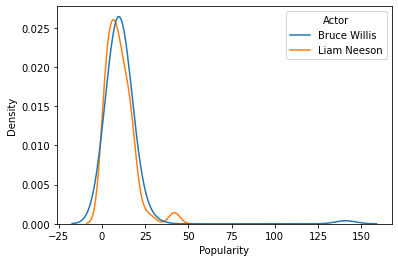

In [100]:
sb.kdeplot(data = bruce_liam, x = 'Popularity', hue = 'Actor')

In general, both actors have similar popularity. __Bruce Willis__ had one movie with a popularity of 140, which drives his higher average popularity.

### Q3) Which of the 6 Lord of the Rings / Hobbit movies had the highest rating?

By creating 2 seperate masks for both franchises, it was possible to extract only the 6 movies. Then they were sorted by the average rating to determine which had the highest.

In [110]:
lotr = df.belongs_to_collection == 'The Lord of the Rings Collection'
hobbit = df.belongs_to_collection == 'The Hobbit Collection'

lotr_hobbit = df.loc[lotr | hobbit, ['title', 'poster_path', 'vote_average']].sort_values('vote_average', ascending = False)
HTML(lotr_hobbit.to_html(escape = False))

,title,poster_path,vote_average
6939,The Lord of the Rings: The Return of the King,,8.10
4821,The Lord of the Rings: The Fellowship of the Ring,,8.00
5767,The Lord of the Rings: The Two Towers,,8.00
21825,The Hobbit: The Desolation of Smaug,,7.60
25116,The Hobbit: The Battle of the Five Armies,,7.10
19779,The Hobbit: An Unexpected Journey,,7.00


All 3 movies of the  __Lord of the Rings__ franchise received higher ratings than the __Hobbit__ franchise. The highest rated of the movie franchises was __LOTR: Return of the King__.

### Q4) What are the top 5 grossing movies that include stars from _The Expendables_?

I will look at this list in two different ways. Movies with the Highest Revenue and the Highest Return on Investment (ROI).

In [135]:
df_4 = df[['cast', 'title', 'poster_path', 'revenue_musd', 'budget_musd']].copy() # Create a seperate dataframe with the relevant attributes
df_4 = df_4.dropna()

In [170]:
# Create a list of the cast from 'The Expendables' which will be used later on for a for loop

df_id = df_4.loc[df['title']=='The Expendables'].cast.str.split('|',expand = True).stack().reset_index(level = 1, drop = True).to_frame()
df_id.columns = ['Actor']
df_id

,Actor
15496,Sylvester Stallone
15496,Jason Statham
15496,Dolph Lundgren
15496,Eric Roberts
15496,Randy Couture
15496,Steve Austin
15496,David Zayas
15496,Giselle Itié
15496,Terry Crews
15496,Mickey Rourke


In [171]:
# Using a for loop and the list from above, I extract the movies with 'The Expendables' cast members in it.

movies = []
star = []
for i in df_id['Actor']:
    x = df_4.loc[df_4.cast.str.contains(i)]
    movies.append(x)
result = pd.concat(movies)
result

,cast,title,poster_path,revenue_musd,budget_musd
22,Sylvester Stallone|Antonio Banderas|Julianne M...,Assassins,<img src='http://image.tmdb.org/t/p/w185//9LaH...,30.30,50.00
170,Sylvester Stallone|Diane Lane|Armand Assante|R...,Judge Dredd,<img src='http://image.tmdb.org/t/p/w185//9nro...,113.49,90.00
310,Sylvester Stallone|Sharon Stone|James Woods|Ro...,The Specialist,<img src='http://image.tmdb.org/t/p/w185//ifqr...,170.36,45.00
428,Sylvester Stallone|John Lithgow|Michael Rooker...,Cliffhanger,<img src='http://image.tmdb.org/t/p/w185//b28D...,255.00,70.00
436,Sylvester Stallone|Wesley Snipes|Sandra Bulloc...,Demolition Man,<img src='http://image.tmdb.org/t/p/w185//49Gj...,159.06,57.00
...,...,...,...,...,...
12469,Jackie Chan|Jet Li|Michael Angarano|Liu Yifei|...,The Forbidden Kingdom,<img src='http://image.tmdb.org/t/p/w185//mkrw...,127.91,55.00
12762,Brendan Fraser|Jet Li|John Hannah|Maria Bello|...,The Mummy: Tomb of the Dragon Emperor,<img src='http://image.tmdb.org/t/p/w185//A3ac...,401.13,145.00
15496,Sylvester Stallone|Jason Statham|Dolph Lundgre...,The Expendables,<img src='http://image.tmdb.org/t/p/w185//cP7o...,274.47,80.00
18077,Sylvester Stallone|Jason Statham|Dolph Lundgre...,The Expendables 2,<img src='http://image.tmdb.org/t/p/w185//6Bxs...,312.57,100.00


In [172]:
result['ROI'] = result.revenue_musd.div(result.budget_musd)

First let's look at the movies with the highest __Revenue__.

In [173]:
# I created a new dataframe from the dataframe above and sorted it by revenue, listing only the top 5 movies

rev_list = result[['title', 'poster_path', 'revenue_musd']].sort_values('revenue_musd', ascending = False).head(5)
HTML(rev_list.to_html(escape=False))

,title,poster_path,revenue_musd
28501,Furious 7,,1506.25
42562,The Fate of the Furious,,1238.76
12396,The Dark Knight,,1004.56
26273,Guardians of the Galaxy Vol. 2,,863.42
20760,Fast & Furious 6,,788.68


It appears that the __Fast and Furious__ franchise has a good showing with 3 movies in the top 5 in terms of revenue.

First let's look at the movies with the highest __ROI__.

In [174]:
# I created a new dataframe from the dataframe above and sorted it by revenue, listing only the top 5 movies

roi_list = result[['title', 'poster_path', 'ROI']].sort_values('ROI', ascending = False).head(5)
HTML(roi_list.to_html(escape=False))

,title,poster_path,ROI
1823,Rocky,,117.24
4451,Look Who's Talking,,39.47
40848,Split,,30.77
2273,Rocky II,,28.60
291,Pulp Fiction,,26.74


It appears that the __Rocky__ franchise has a good showing with 2 movies in the top 5 in terms of ROI.